In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the dataset
inventory = pd.read_csv('datasets/inventory_monitoring.csv')

# Step 3: Preview the data
print(inventory.head())
print(inventory.info())
print(inventory.describe())

# Step 4: Check for null values
print(inventory.isnull().sum())


   Product ID  Store ID  Stock Levels  Supplier Lead Time (days)  \
0        9286        16           700                         10   
1        2605        60            82                         11   
2        2859        55           145                         25   
3        2374        24           151                         17   
4        7678         5           714                         12   

   Stockout Frequency  Reorder Point Expiry Date  Warehouse Capacity  \
0                  14            132  2024-01-15                1052   
1                   1            127  2024-12-16                1262   
2                  14            192  2024-04-30                1457   
3                   6             19  2024-12-16                2944   
4                   2             21  2024-08-05                3739   

   Order Fulfillment Time (days)  
0                              6  
1                              9  
2                             12  
3                 

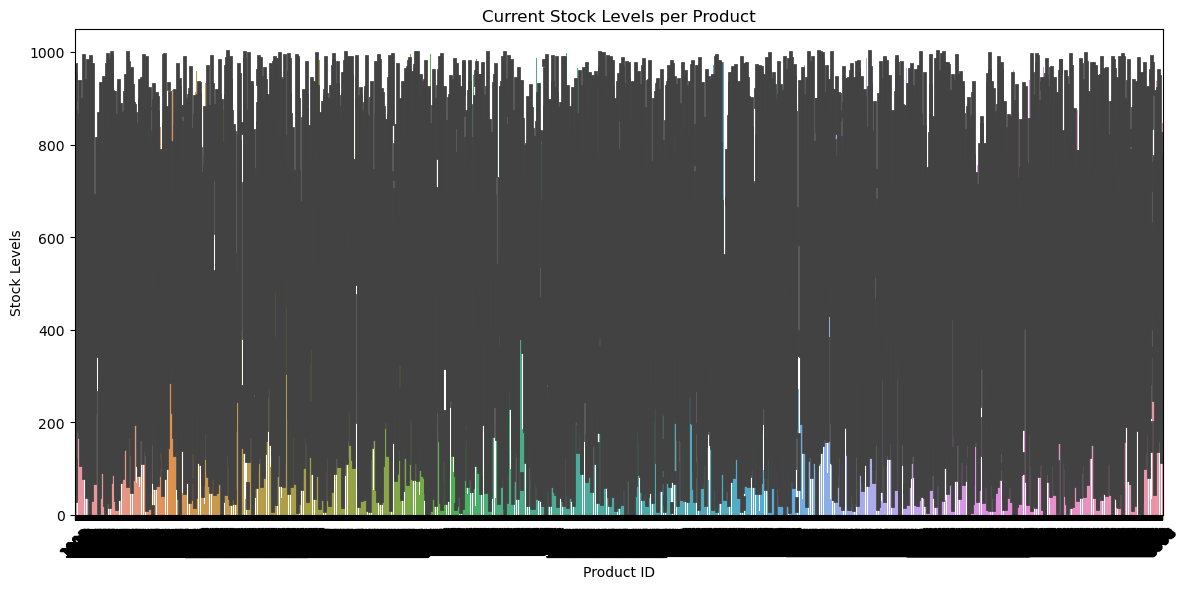

In [5]:
plt.figure(figsize=(12,6))
sns.barplot(data=inventory, x='Product ID', y='Stock Levels')
plt.title('Current Stock Levels per Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [3]:
inventory


,Product ID,Store ID,Stock Levels,Supplier Lead Time (days),Stockout Frequency,Reorder Point,Expiry Date,Warehouse Capacity,Order Fulfillment Time (days)
0,9286,16,700,10,14,132,2024-01-15,1052,6
1,2605,60,82,11,1,127,2024-12-16,1262,9
2,2859,55,145,25,14,192,2024-04-30,1457,12
3,2374,24,151,17,6,19,2024-12-16,2944,3
4,7678,5,714,12,2,21,2024-08-05,3739,7
...,...,...,...,...,...,...,...,...,...
9995,9337,27,860,27,19,96,2024-04-30,4025,12
9996,5907,90,282,25,19,173,2024-03-18,4983,2
9997,6159,7,352,4,6,123,2024-04-23,3517,13
9998,1564,14,325,10,14,153,2024-06-24,4868,1


In [6]:
# Set custom thresholds (can be dynamic based on Reorder Point or Warehouse Capacity)
LOW_STOCK_THRESHOLD = 20
OVERSTOCK_THRESHOLD = 200

# Create alert columns
inventory['Low Stock Alert'] = inventory['Stock Levels'] < LOW_STOCK_THRESHOLD
inventory['Overstock Alert'] = inventory['Stock Levels'] > OVERSTOCK_THRESHOLD

# Display alerts
low_stock = inventory[inventory['Low Stock Alert']]
overstock = inventory[inventory['Overstock Alert']]

print("🟠 Low Stock Items:")
print(low_stock[['Product ID', 'Stock Levels']])

print("\n🔵 Overstocked Items:")
print(overstock[['Product ID', 'Stock Levels']])


🟠 Low Stock Items:
      Product ID  Stock Levels
5           8620            11
267         9763            11
280         3952            10
346         4964            17
381         1648             1
...          ...           ...
9653        4449            18
9745        8420             1
9803        9650            17
9849        2375             8
9868        5732            13

[182 rows x 2 columns]

🔵 Overstocked Items:
      Product ID  Stock Levels
0           9286           700
4           7678           714
6           7599           960
8           1002           569
9           8343           462
...          ...           ...
9995        9337           860
9996        5907           282
9997        6159           352
9998        1564           325
9999        2492           633

[8014 rows x 2 columns]


In [7]:
# Suggest reorder quantity based on target being 100 units above reorder point
inventory['Suggested Reorder Qty'] = inventory.apply(
    lambda row: (row['Reorder Point'] + 100 - row['Stock Levels']) 
    if row['Low Stock Alert'] else 0, axis=1
)

print("🛒 Suggested Reorders:")
print(inventory[inventory['Suggested Reorder Qty'] > 0][['Product ID', 'Suggested Reorder Qty']])


🛒 Suggested Reorders:
      Product ID  Suggested Reorder Qty
5           8620                    282
267         9763                    179
280         3952                    221
346         4964                    254
381         1648                    186
...          ...                    ...
9653        4449                    158
9745        8420                    139
9803        9650                    217
9849        2375                    122
9868        5732                    275

[182 rows x 2 columns]


In [8]:
from datetime import datetime

# Convert Expiry Date to datetime
inventory['Expiry Date'] = pd.to_datetime(inventory['Expiry Date'], errors='coerce')

# Flag items expiring within 30 days
today = pd.Timestamp(datetime.today())
inventory['Expiring Soon'] = inventory['Expiry Date'] <= today + pd.Timedelta(days=30)

print("⚠️ Products Expiring Soon:")
print(inventory[inventory['Expiring Soon']][['Product ID', 'Expiry Date']])


⚠️ Products Expiring Soon:
      Product ID Expiry Date
0           9286  2024-01-15
1           2605  2024-12-16
2           2859  2024-04-30
3           2374  2024-12-16
4           7678  2024-08-05
...          ...         ...
9995        9337  2024-04-30
9996        5907  2024-03-18
9997        6159  2024-04-23
9998        1564  2024-06-24
9999        2492  2024-10-30

[10000 rows x 2 columns]


In [9]:
# Simple usage rate (can be enhanced with other columns)
inventory['Usage % of Capacity'] = (inventory['Stock Levels'] / inventory['Warehouse Capacity']) * 100

# Flag overloaded items
inventory['Over Capacity'] = inventory['Usage % of Capacity'] > 100

print("📦 Over Capacity Products:")
print(inventory[inventory['Over Capacity']][['Product ID', 'Usage % of Capacity']])


📦 Over Capacity Products:
Empty DataFrame
Columns: [Product ID, Usage % of Capacity]
Index: []
